In [77]:
import pandas as pd

# Load Historical Trader Data from Google Drive
trader_data_url = 'https://drive.google.com/uc?export=download&id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs'
trader_df = pd.read_csv(trader_data_url)

# Load Bitcoin Market Sentiment Dataset from Google Drive
sentiment_data_url = 'https://drive.google.com/uc?export=download&id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf'
sentiment_df = pd.read_csv(sentiment_data_url)

print("Historical Trader Data:")
display(trader_df.head())

print("\nBitcoin Market Sentiment Data:")
display(sentiment_df.head())

Historical Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



Bitcoin Market Sentiment Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [78]:
import os
output_dir = 'ds_Krishnamurthi/outputs'
print(f"Contents of the '{output_dir}' directory:")
try:
    for item in os.listdir(output_dir):
        print(item)
except FileNotFoundError:
    print(f"The directory '{output_dir}' was not found. Please ensure the root directory name is correct and the directory was created.")

Contents of the 'ds_Krishnamurthi/outputs' directory:
closed_pnl_vs_sentiment_score_regplot.png
closed_pnl_boxplot.png
daily_total_trade_size_by_sentiment_classification_boxplot.png
trade_size_usd_by_sentiment_classification_boxplot_2.png
trade_size_usd_by_sentiment_classification_boxplot.png
daily_average_closed_pnl_by_sentiment_classification_boxplot.png
total_daily_trade_size_trend.png
trade_size_usd_histogram.png
average_sentiment_score_trend.png
average_sentiment_score_trend_2.png
daily_total_trade_size_vs_sentiment_score_scatterplot.png
average_daily_closed_pnl_trend_2.png
average_daily_closed_pnl_trend.png
trade_size_usd_boxplot.png
closed_pnl_vs_sentiment_score_scatterplot.png
daily_total_trade_size_by_sentiment_classification_boxplot_2.png
total_daily_trade_size_trend_2.png
sentiment_score_distribution.png
execution_price_by_sentiment_classification_boxplot.png
daily_average_closed_pnl_vs_sentiment_score_scatterplot.png
closed_pnl_histogram.png


# Task
Analyze the provided "Historical Trader Data from Hyperliquid" ("https://drive.google.com/file/d/1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs/view?usp=sharing") and "Bitcoin Market Sentiment Dataset" ("https://drive.google.com/file/d/1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf/view?usp=sharing") to understand the relationship between trader behavior and market sentiment. Identify trends and signals that could inform trading strategies and present the findings in a structured format including notebooks, data files, outputs, and a report.

## Data preprocessing

Prepared both the `trader_df` and `sentiment_df` for analysis. This might involve cleaning data, converting data types (especially dates/timestamps), and handling missing values.


In [79]:

print("Trader Data Info:")
trader_df.info()
print("\nMissing values in trader_df:")
print(trader_df.isnull().sum())


print("\nSentiment Data Info:")
sentiment_df.info()
print("\nMissing values in sentiment_df:")
print(sentiment_df.isnull().sum())

trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
sentiment_df['timestamp'] = pd.to_datetime(sentiment_df['timestamp'], unit='s')
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

print("\nTrader Data Info after datetime conversion:")
trader_df.info()
print("\nSentiment Data Info after datetime conversion:")
sentiment_df.info()

Trader Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes:

## Feature engineering

Created relevant features from the datasets that can be used to analyze the relationship between trading behavior and market sentiment. This could involve extracting date components, categorizing trades, or calculating profitability metrics.


In [80]:
# 1. Extract the date from the `Timestamp IST` column in `trader_df`
trader_df['Date'] = trader_df['Timestamp IST'].dt.date

# 2. Categorize trades in `trader_df` based on `Side` and `Direction`
trader_df['Trade_Type'] = trader_df['Side'] + '_' + trader_df['Direction']

# 3. Calculate the daily total `Size USD` and daily average `Closed PnL` for each account in `trader_df`.
daily_account_metrics = trader_df.groupby(['Account', 'Date']).agg(
    Daily_Total_Size_USD=('Size USD', 'sum'),
    Daily_Average_Closed_PnL=('Closed PnL', 'mean')
).reset_index()
trader_df = pd.merge(trader_df, daily_account_metrics, on=['Account', 'Date'], how='left')


# 4. Create a numerical representation for the `classification` column in `sentiment_df`
sentiment_mapping = {
    'Extreme Fear': 1,
    'Fear': 2,
    'Neutral': 3,
    'Greed': 4,
    'Extreme Greed': 5
}
sentiment_df['Sentiment_Score'] = sentiment_df['classification'].map(sentiment_mapping)
print("Trader Data with new features:")
display(trader_df.head())

print("\nSentiment Data with Sentiment Score:")
display(sentiment_df.head())

Trader Data with new features:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,Trade_Type,Daily_Total_Size_USD,Daily_Average_Closed_PnL
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,BUY_Buy,78277.3,0.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,BUY_Buy,78277.3,0.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,BUY_Buy,78277.3,0.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,BUY_Buy,78277.3,0.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,BUY_Buy,78277.3,0.0



Sentiment Data with Sentiment Score:


,timestamp,value,classification,date,Sentiment_Score
0,2018-02-01 05:30:00,30,Fear,2018-02-01,2
1,2018-02-02 05:30:00,15,Extreme Fear,2018-02-02,1
2,2018-02-03 05:30:00,40,Fear,2018-02-03,2
3,2018-02-04 05:30:00,24,Extreme Fear,2018-02-04,1
4,2018-02-05 05:30:00,11,Extreme Fear,2018-02-05,1


## Data merging

Combine the processed datasets based on relevant keys (likely time or date) to create a unified dataset for analysis.


**Reasoning**:
Convert the date columns to datetime objects and then merge the dataframes based on the date.



In [81]:
trader_df['Date'] = pd.to_datetime(trader_df['Date'])
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
merged_df = pd.merge(trader_df, sentiment_df[['date', 'value', 'classification', 'Sentiment_Score']],
                     left_on='Date', right_on='date', how='left')

merged_df = merged_df.drop('date', axis=1)
print("Merged DataFrame Head:")
display(merged_df.head())

print("\nMerged DataFrame Info:")
merged_df.info()

Merged DataFrame Head:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Fee,Trade ID,Timestamp,Date,Trade_Type,Daily_Total_Size_USD,Daily_Average_Closed_PnL,value,classification,Sentiment_Score
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,0.345404,8.950000e+14,1.730000e+12,2024-12-02,BUY_Buy,78277.3,0.0,80.0,Extreme Greed,5.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,0.005600,4.430000e+14,1.730000e+12,2024-12-02,BUY_Buy,78277.3,0.0,80.0,Extreme Greed,5.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,0.050431,6.600000e+14,1.730000e+12,2024-12-02,BUY_Buy,78277.3,0.0,80.0,Extreme Greed,5.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,0.050043,1.080000e+15,1.730000e+12,2024-12-02,BUY_Buy,78277.3,0.0,80.0,Extreme Greed,5.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,0.003055,1.050000e+15,1.730000e+12,2024-12-02,BUY_Buy,78277.3,0.0,80.0,Extreme Greed,5.0



Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Account                   211224 non-null  object        
 1   Coin                      211224 non-null  object        
 2   Execution Price           211224 non-null  float64       
 3   Size Tokens               211224 non-null  float64       
 4   Size USD                  211224 non-null  float64       
 5   Side                      211224 non-null  object        
 6   Timestamp IST             211224 non-null  datetime64[ns]
 7   Start Position            211224 non-null  float64       
 8   Direction                 211224 non-null  object        
 9   Closed PnL                211224 non-null  float64       
 10  Transaction Hash          211224 non-null  object        
 11  Order ID                  211224 non-null

## Exploratory data analysis (eda)

Perform exploratory analysis on the merged dataset to understand the distributions of key variables and identify initial patterns and correlations between trading behavior and sentiment. This could involve visualizations and summary statistics.


In [82]:
# Calculate and display summary statistics for key numerical columns
summary_stats = merged_df[['Execution Price', 'Size USD', 'Closed PnL',
                           'Daily_Total_Size_USD', 'Daily_Average_Closed_PnL',
                           'value', 'Sentiment_Score']].describe()

print("Summary Statistics for Key Numerical Columns:")
display(summary_stats)

Summary Statistics for Key Numerical Columns:


,Execution Price,Size USD,Closed PnL,Daily_Total_Size_USD,Daily_Average_Closed_PnL,value,Sentiment_Score
count,211224.000000,2.112240e+05,211224.000000,2.112240e+05,211224.000000,211218.000000,211218.000000
mean,11414.723350,5.639451e+03,48.749001,2.974613e+06,48.749001,51.649656,3.121439
std,29447.654868,3.657514e+04,919.164828,6.785620e+06,309.091955,21.012784,1.295689
min,0.000005,0.000000e+00,-117990.104100,0.000000e+00,-18615.393305,10.000000,1.000000
25%,4.854700,1.937900e+02,0.000000,1.615723e+05,0.842100,33.000000,2.000000
50%,18.280000,5.970450e+02,0.000000,6.399697e+05,7.378088,49.000000,3.000000
75%,101.580000,2.058960e+03,5.792797,2.657908e+06,35.753719,72.000000,4.000000
max,109004.000000,3.921431e+06,135329.090100,5.125045e+07,14999.924526,94.000000,5.000000



Distribution of Sentiment Classification:


,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400



Distribution of Sentiment Score:


,count
Sentiment_Score,
2.0,61837
4.0,50303
5.0,39992
3.0,37686
1.0,21400


/tmp/ipython-input-3791623381.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment_Score', data=merged_df, palette='viridis')


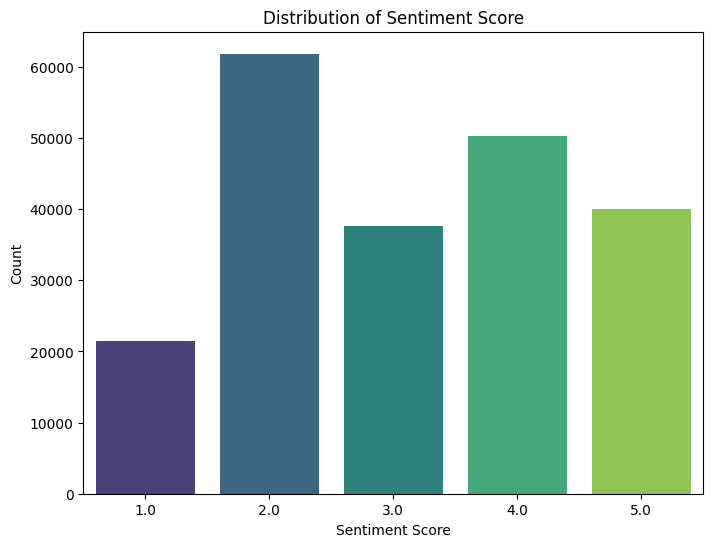

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import os


output_dir = 'ds_Krishnamurthi/outputs'
os.makedirs(output_dir, exist_ok=True)

# Analyze the distribution of 'classification' and 'Sentiment_Score'
print("\nDistribution of Sentiment Classification:")
display(merged_df['classification'].value_counts())

print("\nDistribution of Sentiment Score:")
display(merged_df['Sentiment_Score'].value_counts())

# Visualize the distribution of 'Sentiment_Score'
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment_Score', data=merged_df, palette='viridis')
plt.title('Distribution of Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.savefig(os.path.join(output_dir, 'sentiment_score_distribution.png'))
plt.show()

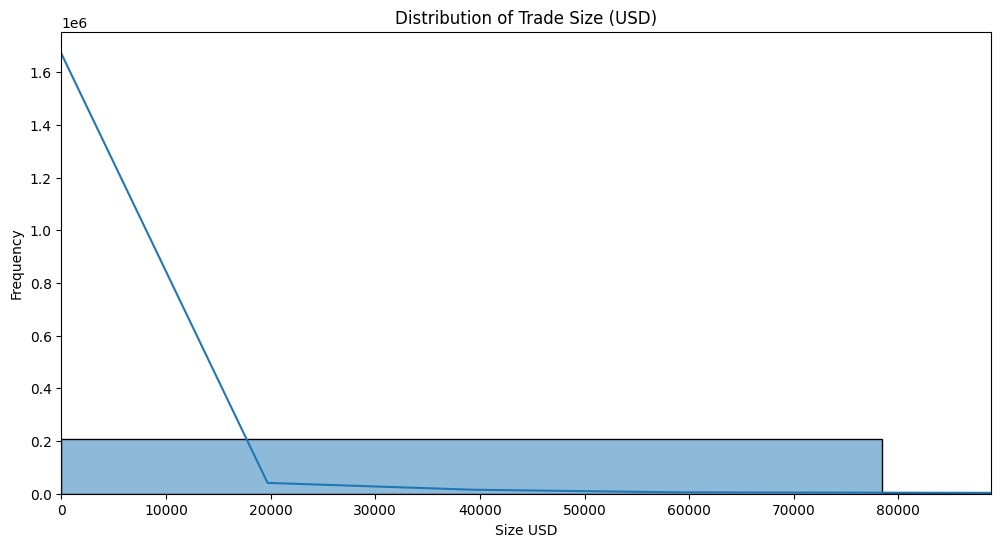

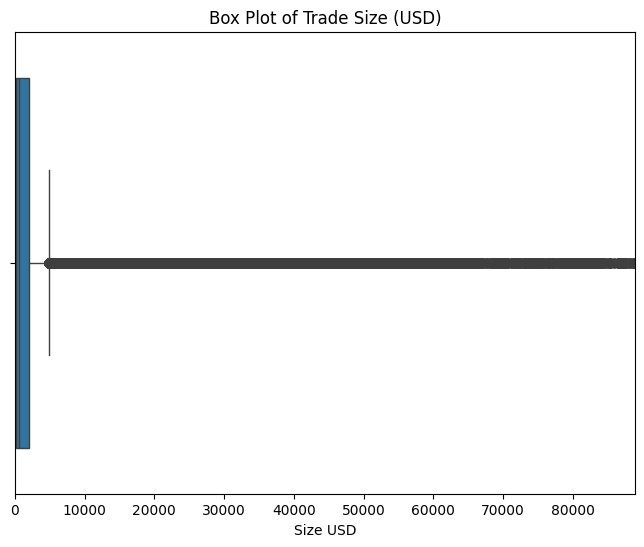

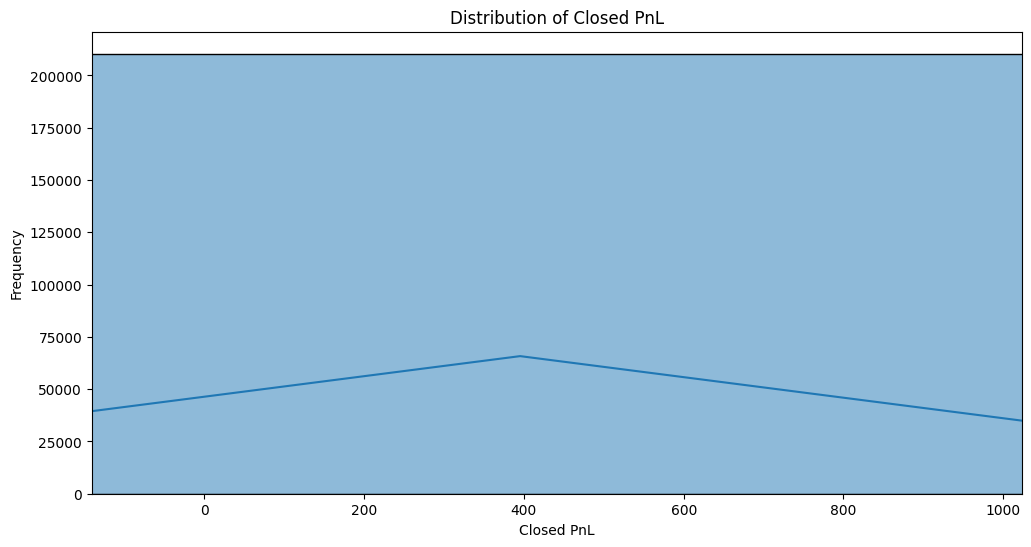

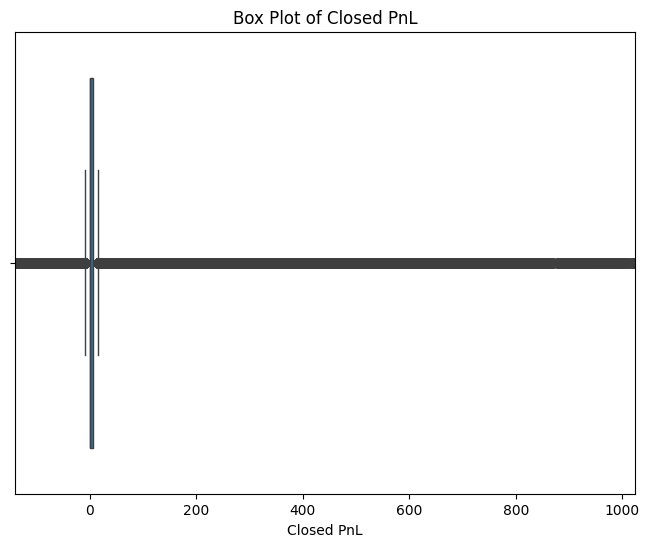

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

output_dir = 'ds_Krishnamurthi/outputs'
os.makedirs(output_dir, exist_ok=True)

# Explore the distribution of trading volume ('Size USD')
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['Size USD'], bins=50, kde=True)
plt.title('Distribution of Trade Size (USD)')
plt.xlabel('Size USD')
plt.ylabel('Frequency')
plt.xlim(0, merged_df['Size USD'].quantile(0.99)) # Limit x-axis for better visualization
plt.savefig(os.path.join(output_dir, 'trade_size_usd_histogram.png'))
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_df['Size USD'])
plt.title('Box Plot of Trade Size (USD)')
plt.xlabel('Size USD')
plt.xlim(0, merged_df['Size USD'].quantile(0.99)) # Limit x-axis for better visualization
plt.savefig(os.path.join(output_dir, 'trade_size_usd_boxplot.png'))
plt.show()


# Explore the distribution of profitability ('Closed PnL')
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['Closed PnL'], bins=50, kde=True)
plt.title('Distribution of Closed PnL')
plt.xlabel('Closed PnL')
plt.ylabel('Frequency')
plt.xlim(merged_df['Closed PnL'].quantile(0.01), merged_df['Closed PnL'].quantile(0.99)) # Limit x-axis for better visualization
plt.savefig(os.path.join(output_dir, 'closed_pnl_histogram.png'))
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_df['Closed PnL'])
plt.title('Box Plot of Closed PnL')
plt.xlabel('Closed PnL')
plt.xlim(merged_df['Closed PnL'].quantile(0.01), merged_df['Closed PnL'].quantile(0.99)) # Limit y-axis for better visualization
plt.savefig(os.path.join(output_dir, 'closed_pnl_boxplot.png'))
plt.show()

**Reasoning**:
Visualize the relationship between sentiment metrics and trading behavior metrics using scatter plots and box plots.



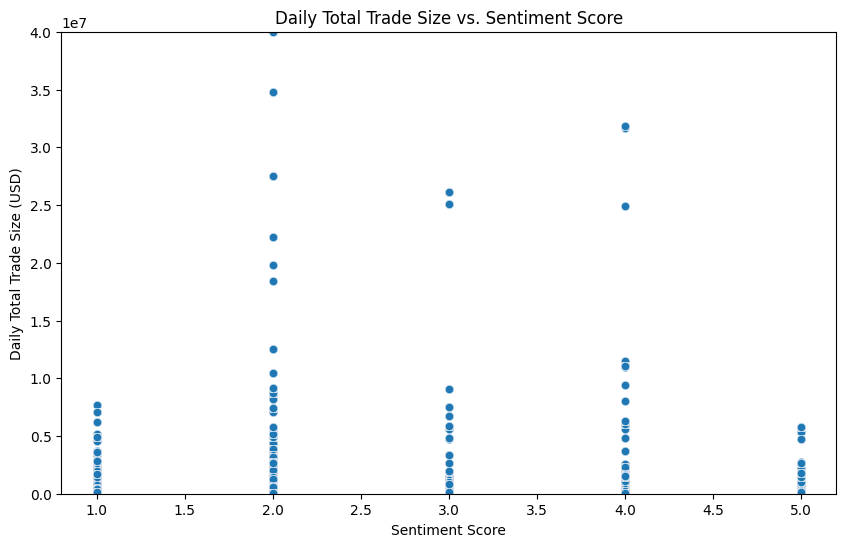

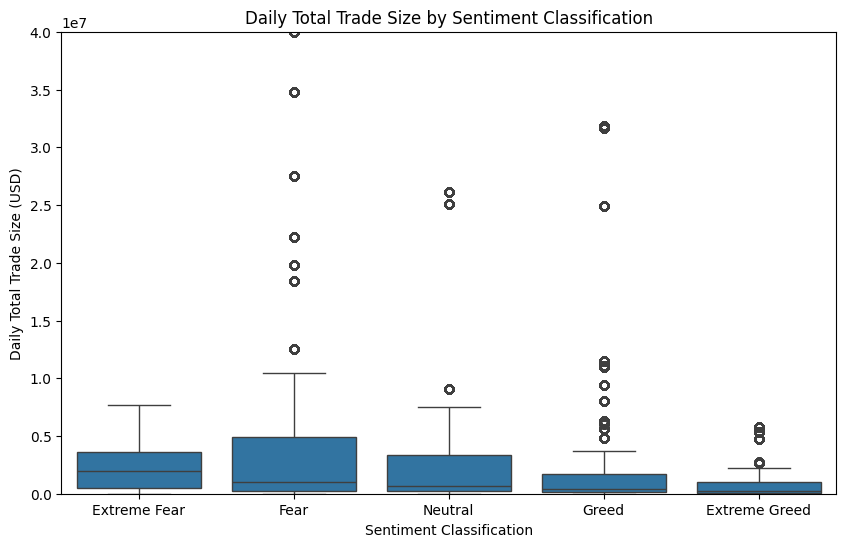

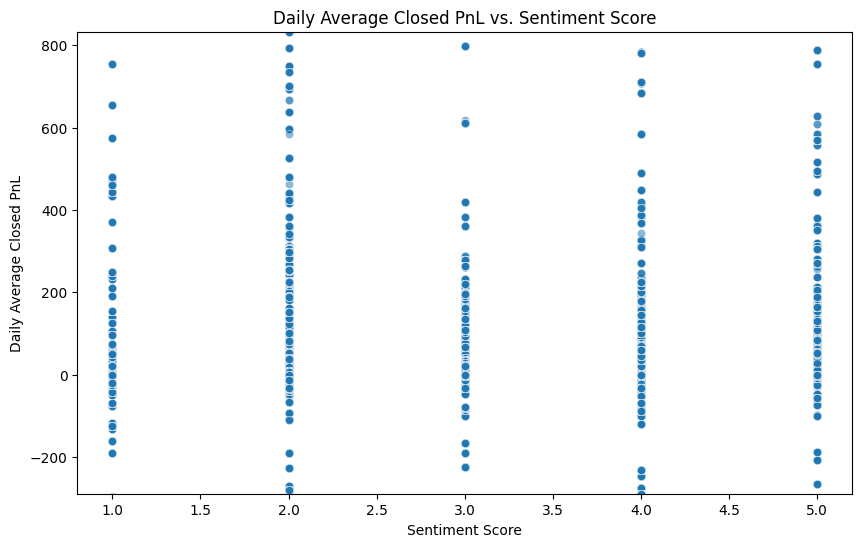

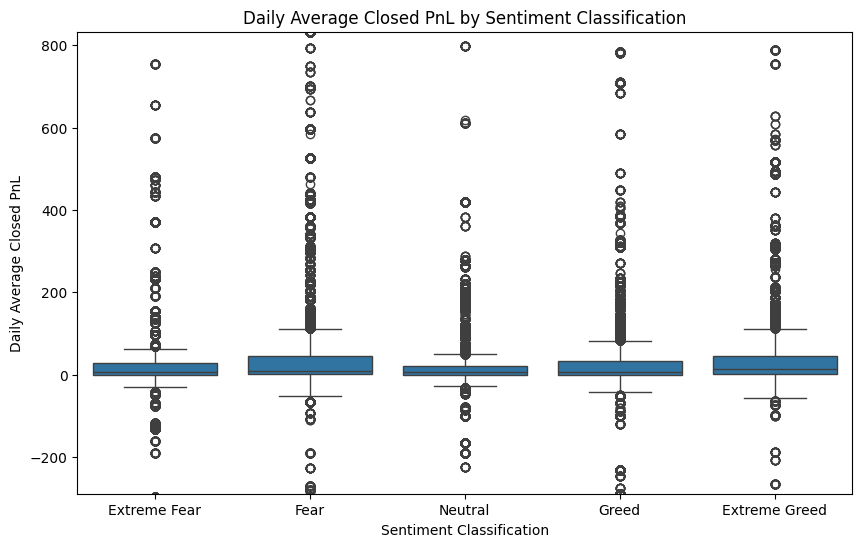

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

output_dir = 'ds_Krishnamurthi/outputs'
os.makedirs(output_dir, exist_ok=True)

# Explore the relationship between sentiment and daily trading volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sentiment_Score', y='Daily_Total_Size_USD', data=merged_df, alpha=0.5)
plt.title('Daily Total Trade Size vs. Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Total Trade Size (USD)')
plt.ylim(0, merged_df['Daily_Total_Size_USD'].quantile(0.99)) # Limit y-axis for better visualization
plt.savefig(os.path.join(output_dir, 'daily_total_trade_size_vs_sentiment_score_scatterplot.png'))
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='Daily_Total_Size_USD', data=merged_df, order=sentiment_mapping.keys())
plt.title('Daily Total Trade Size by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Daily Total Trade Size (USD)')
plt.ylim(0, merged_df['Daily_Total_Size_USD'].quantile(0.99)) # Limit y-axis for better visualization
plt.savefig(os.path.join(output_dir, 'daily_total_trade_size_by_sentiment_classification_boxplot.png'))
plt.show()

# Explore the relationship between sentiment and daily average profitability
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sentiment_Score', y='Daily_Average_Closed_PnL', data=merged_df, alpha=0.5)
plt.title('Daily Average Closed PnL vs. Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Average Closed PnL')
plt.ylim(merged_df['Daily_Average_Closed_PnL'].quantile(0.01), merged_df['Daily_Average_Closed_PnL'].quantile(0.99)) # Limit y-axis for better visualization
plt.savefig(os.path.join(output_dir, 'daily_average_closed_pnl_vs_sentiment_score_scatterplot.png'))

plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='Daily_Average_Closed_PnL', data=merged_df, order=sentiment_mapping.keys())
plt.title('Daily Average Closed PnL by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Daily Average Closed PnL')
plt.ylim(merged_df['Daily_Average_Closed_PnL'].quantile(0.01), merged_df['Daily_Average_Closed_PnL'].quantile(0.99)) # Limit y-axis for better visualization
plt.savefig(os.path.join(output_dir, 'daily_average_closed_pnl_by_sentiment_classification_boxplot.png'))
plt.show()

**Reasoning**:
Visualize the trend of daily total trade size, daily average closed PnL, and sentiment score over time to identify any temporal patterns or correlations.



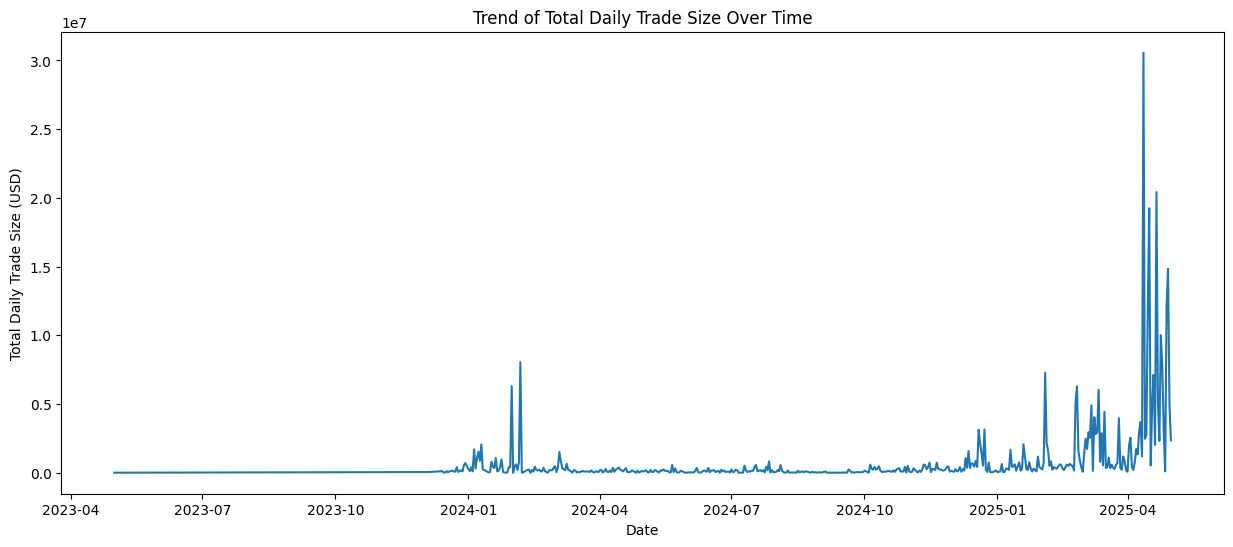

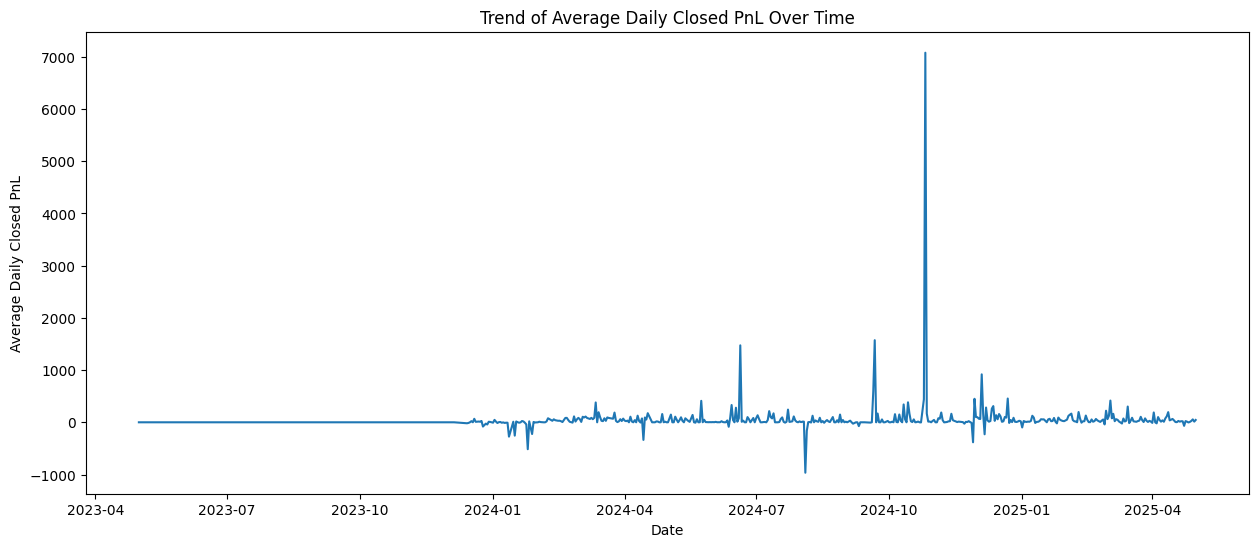

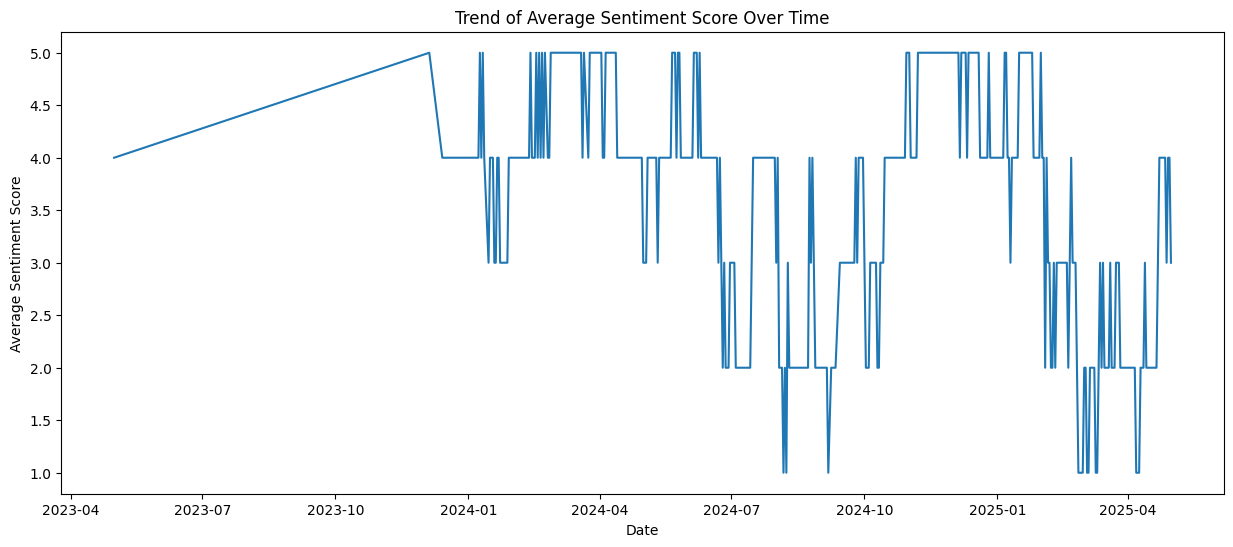

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

output_dir = 'ds_Krishnamurthi/outputs'
os.makedirs(output_dir, exist_ok=True)

# Aggregate daily metrics for plotting trends over time
daily_agg_df = merged_df.groupby('Date').agg(
    Total_Daily_Size_USD=('Daily_Total_Size_USD', 'mean'),
    Average_Daily_PnL=('Daily_Average_Closed_PnL', 'mean'),
    Average_Sentiment_Score=('Sentiment_Score', 'mean')
).reset_index()

# Plot the trend of daily total trade size over time
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Total_Daily_Size_USD', data=daily_agg_df)
plt.title('Trend of Total Daily Trade Size Over Time')
plt.xlabel('Date')
plt.ylabel('Total Daily Trade Size (USD)')
plt.savefig(os.path.join(output_dir, 'total_daily_trade_size_trend.png'))
plt.show()

# Plot the trend of daily average closed PnL over time
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Average_Daily_PnL', data=daily_agg_df)
plt.title('Trend of Average Daily Closed PnL Over Time')
plt.xlabel('Date')
plt.ylabel('Average Daily Closed PnL')
plt.savefig(os.path.join(output_dir, 'average_daily_closed_pnl_trend.png'))
plt.show()

# Plot the trend of average sentiment score over time
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Average_Sentiment_Score', data=daily_agg_df)
plt.title('Trend of Average Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.savefig(os.path.join(output_dir, 'average_sentiment_score_trend.png'))
plt.show()

## Relationship analysis

### Subtask:
Analyze the relationship between different aspects of trading behavior (profitability, risk, volume, leverage) and market sentiment (fear vs greed). This might involve statistical tests, correlation analysis, or visualizing trends over time.


**Reasoning**:
Calculate and visualize the correlation matrix for the specified numerical columns in the merged_df, and then group by classification and calculate the mean of specified columns.



Correlation Matrix:


,Execution Price,Size USD,Closed PnL,Daily_Total_Size_USD,Daily_Average_Closed_PnL,value,Sentiment_Score
Execution Price,1.000000,0.189855,-0.006505,0.427135,-0.011527,-0.027558,-0.038316
Size USD,0.189855,1.000000,0.123589,0.204035,0.022913,-0.029843,-0.031912
Closed PnL,-0.006505,0.123589,1.000000,0.004282,0.336275,0.008121,0.005970
Daily_Total_Size_USD,0.427135,0.204035,0.004282,1.000000,0.012735,-0.149257,-0.157527
Daily_Average_Closed_PnL,-0.011527,0.022913,0.336275,0.012735,1.000000,0.024296,0.017862
value,-0.027558,-0.029843,0.008121,-0.149257,0.024296,1.000000,0.967158
Sentiment_Score,-0.038316,-0.031912,0.005970,-0.157527,0.017862,0.967158,1.000000


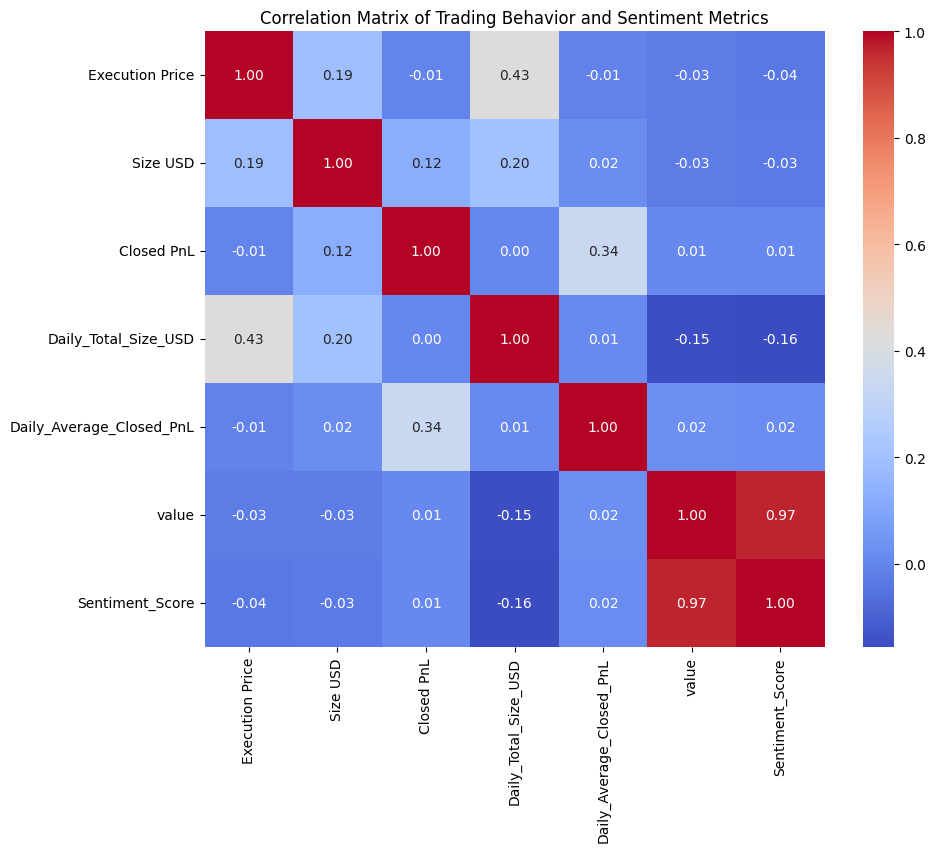


Mean Trading Metrics by Sentiment Classification:


,classification,Daily_Total_Size_USD,Daily_Average_Closed_PnL
0,Extreme Fear,2.245017e+06,34.537862
1,Extreme Greed,8.060518e+05,67.892861
2,Fear,5.178086e+06,54.290400
3,Greed,2.695228e+06,42.743559
4,Neutral,2.447986e+06,34.307718


In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculate the correlation matrix
correlation_cols = ['Execution Price', 'Size USD', 'Closed PnL',
                      'Daily_Total_Size_USD', 'Daily_Average_Closed_PnL',
                      'value', 'Sentiment_Score']
correlation_matrix = merged_df[correlation_cols].corr()

print("Correlation Matrix:")
display(correlation_matrix)

# 2. Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Trading Behavior and Sentiment Metrics')
plt.show()

# 3. Group the merged_df by 'classification' and calculate the mean of key trading behavior metrics
sentiment_grouped_metrics = merged_df.groupby('classification')[['Daily_Total_Size_USD', 'Daily_Average_Closed_PnL']].mean().reset_index()

print("\nMean Trading Metrics by Sentiment Classification:")
display(sentiment_grouped_metrics)


ANOVA for Daily_Total_Size_USD across Sentiment Classifications:


,sum_sq,df,F,PR(>F)
C(classification),5.140751e+17,4.0,2946.822355,0.0
Residual,9.211561e+18,211213.0,NaN,NaN



ANOVA for Daily_Average_Closed_PnL across Sentiment Classifications:


,sum_sq,df,F,PR(>F)
C(classification),3.054248e+07,4.0,81.235324,5.092036e-69
Residual,1.985272e+10,211213.0,NaN,NaN


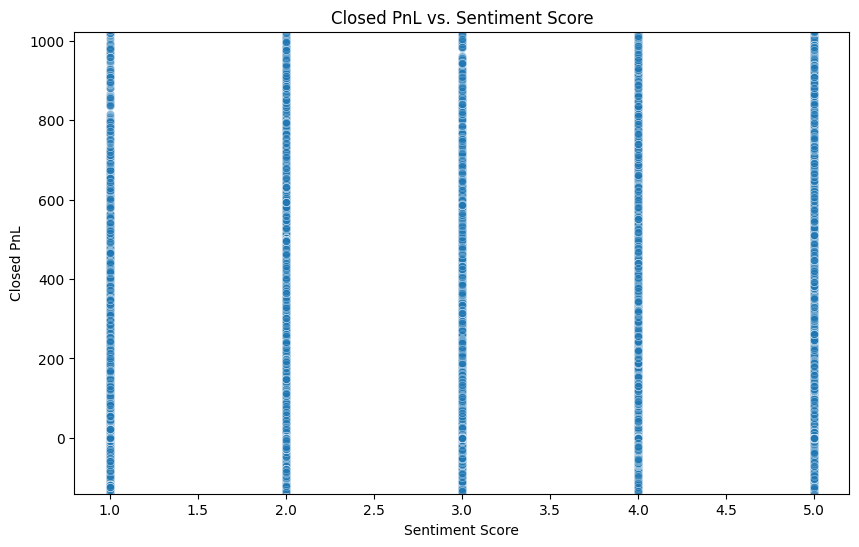

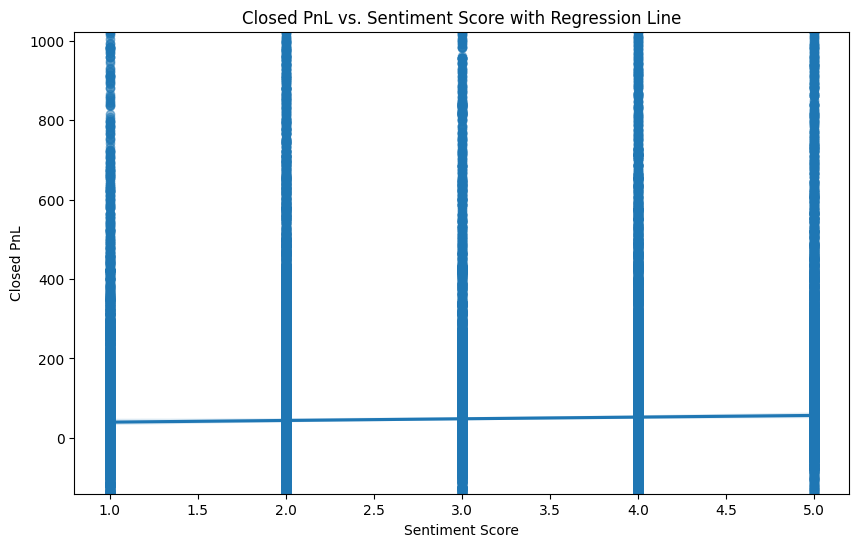

In [88]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import os

output_dir = 'ds_Krishnamurthi/outputs'
os.makedirs(output_dir, exist_ok=True)

# 4. Perform ANOVA tests
# ANOVA for Daily_Total_Size_USD across sentiment classifications
model_volume = ols('Daily_Total_Size_USD ~ C(classification)', data=merged_df).fit()
anova_table_volume = sm.stats.anova_lm(model_volume, typ=2)
print("\nANOVA for Daily_Total_Size_USD across Sentiment Classifications:")
display(anova_table_volume)

# ANOVA for Daily_Average_Closed_PnL across sentiment classifications
model_pnl = ols('Daily_Average_Closed_PnL ~ C(classification)', data=merged_df).fit()
anova_table_pnl = sm.stats.anova_lm(model_pnl, typ=2)
print("\nANOVA for Daily_Average_Closed_PnL across Sentiment Classifications:")
display(anova_table_pnl)


# 5. Visualize the relationship between sentiment score and 'Closed PnL' using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sentiment_Score', y='Closed PnL', data=merged_df, alpha=0.5)
plt.title('Closed PnL vs. Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Closed PnL')
# Limit y-axis for better visualization due to outliers
plt.ylim(merged_df['Closed PnL'].quantile(0.01), merged_df['Closed PnL'].quantile(0.99))
plt.savefig(os.path.join(output_dir, 'closed_pnl_vs_sentiment_score_scatterplot.png'))
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='Sentiment_Score', y='Closed PnL', data=merged_df, scatter_kws={'alpha':0.5})
plt.title('Closed PnL vs. Sentiment Score with Regression Line')
plt.xlabel('Sentiment Score')
plt.ylabel('Closed PnL')
# Limit y-axis for better visualization due to outliers
plt.ylim(merged_df['Closed PnL'].quantile(0.01), merged_df['Closed PnL'].quantile(0.99))
plt.savefig(os.path.join(output_dir, 'closed_pnl_vs_sentiment_score_regplot.png'))
plt.show()

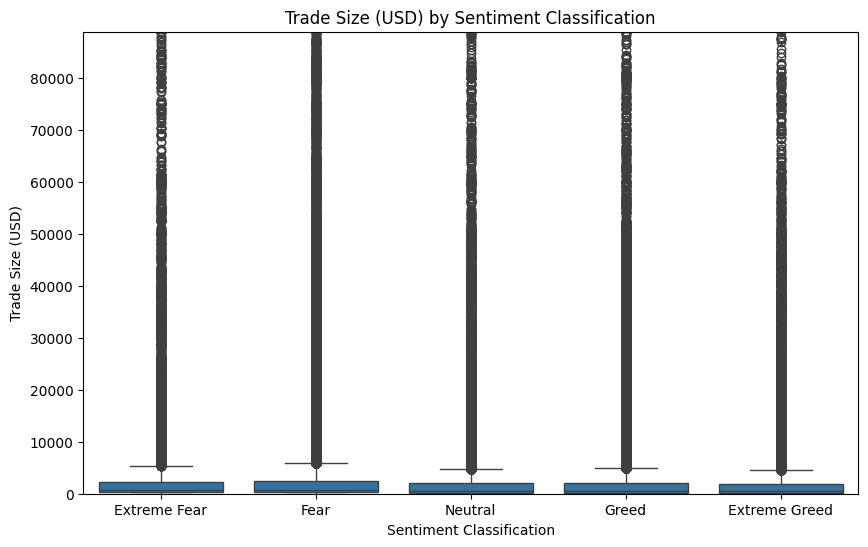

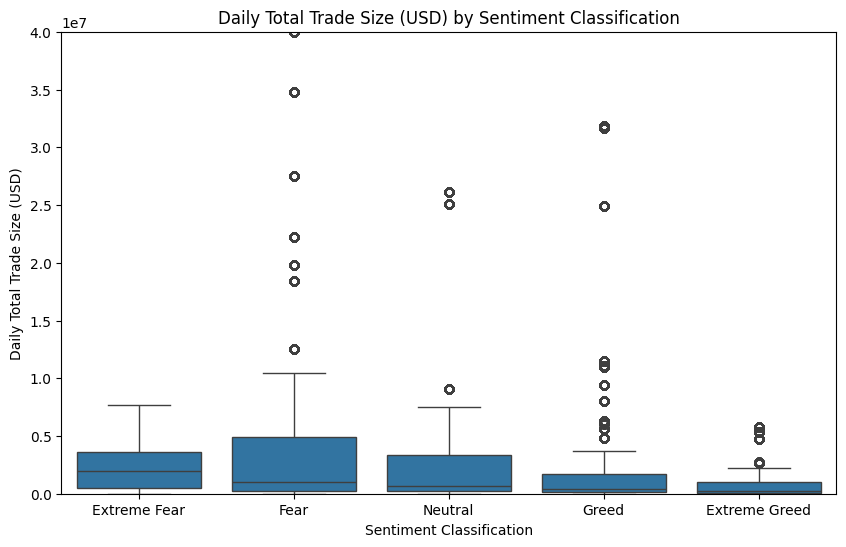

In [89]:
import os
import glob
import shutil
import matplotlib.pyplot as plt
import seaborn as sns

output_dir = 'ds_Krishnamurthi/outputs'
os.makedirs(output_dir, exist_ok=True)

# 6. Analyze how trading volume ('Size USD' or 'Daily_Total_Size_USD') varies with sentiment classification using visualizations like box plots or bar plots.
plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='Size USD', data=merged_df, order=sentiment_mapping.keys())
plt.title('Trade Size (USD) by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Trade Size (USD)')
# Limited the range of y-axis due to outliers
plt.ylim(0, merged_df['Size USD'].quantile(0.99))
plt.savefig(os.path.join(output_dir, 'trade_size_usd_by_sentiment_classification_boxplot.png'))
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='Daily_Total_Size_USD', data=merged_df, order=sentiment_mapping.keys())
plt.title('Daily Total Trade Size (USD) by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Daily Total Trade Size (USD)')
plt.ylim(0, merged_df['Daily_Total_Size_USD'].quantile(0.99)) # Limit y-axis for better visualization
plt.savefig(os.path.join(output_dir, 'daily_total_trade_size_by_sentiment_classification_boxplot_2.png'))
plt.show()

In [90]:
# Display the accounts with high average PnL during Extreme Fear
print("\nAccounts with High Average PnL during Extreme Fear:")
display(profitable_accounts_extreme_fear)


Accounts with High Average PnL during Extreme Fear:


,Account,classification,Average_Size_USD,Average_Closed_PnL,Total_Trades
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Fear,15071.00860,1247.692214,100
80,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,Extreme Fear,2613.95276,900.002541,221


## Identifying hidden trends/signals

### Subtask:
Look for less obvious patterns or signals in the data that could influence trading strategies. This might involve more advanced analysis techniques or domain knowledge.


**insight**
Analyze the relationship between Trade_Type and Closed PnL under different sentiment conditions by grouping the data by classification and Trade_Type and calculating the mean of Closed PnL. This addresses instruction 1. Then, analyze the distribution of 'Execution Price' and 'Size USD' for different sentiment classifications using box plots to address instruction 4.



Average Closed PnL by Sentiment Classification and Trade Type:


,classification,Trade_Type,Closed PnL
0,Extreme Fear,BUY_Buy,0.000000
1,Extreme Fear,BUY_Close Short,123.400238
2,Extreme Fear,BUY_Open Long,0.000000
3,Extreme Fear,BUY_Short > Long,-1932.516940
4,Extreme Fear,SELL_Close Long,81.197371
5,Extreme Fear,SELL_Long > Short,1.331956
6,Extreme Fear,SELL_Open Short,0.000000
7,Extreme Fear,SELL_Sell,-135.021730
8,Extreme Fear,SELL_Spot Dust Conversion,0.000000
9,Extreme Greed,BUY_Buy,0.000000



Pivoted Average Closed PnL by Trade Type and Sentiment Classification:


classification,Extreme Fear,Extreme Greed,Fear,Greed,Neutral
Trade_Type,,,,,
BUY_Buy,0.000000,0.000000,0.000000,0.000000,0.000000
BUY_Close Short,123.400238,28.970490,207.676658,55.195496,94.796313
BUY_Liquidated Isolated Short,NaN,NaN,NaN,-12752.913040,NaN
BUY_Open Long,0.000000,0.000000,0.000000,0.000000,0.000000
BUY_Settlement,NaN,NaN,NaN,-29.215368,NaN
BUY_Short > Long,-1932.516940,11.771238,1115.943156,100.665716,-11.945100
SELL_Auto-Deleveraging,NaN,NaN,NaN,7184.807003,NaN
SELL_Close Long,81.197371,61.830783,83.000111,88.958554,52.815787
SELL_Long > Short,1.331956,120.600968,4.795642,22.711911,47.332193


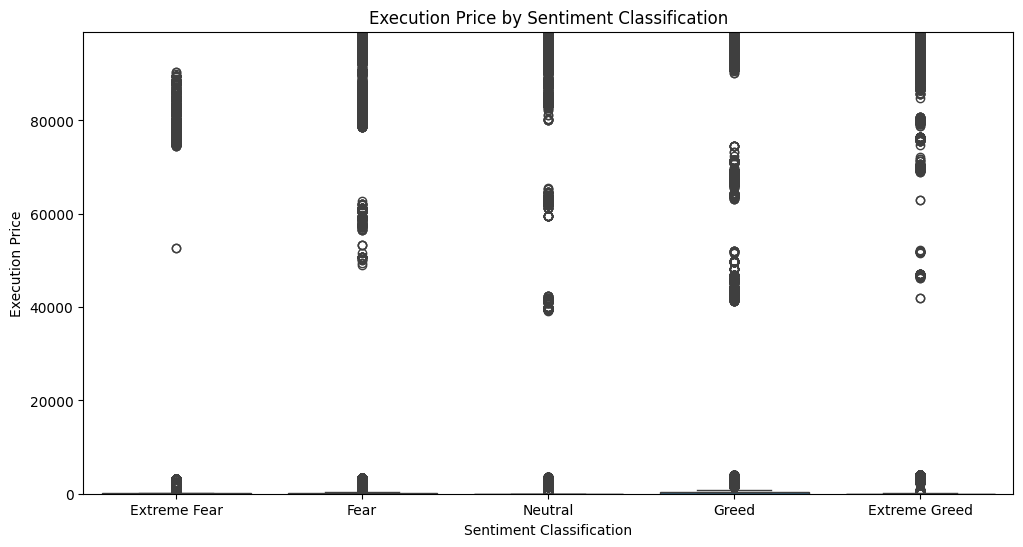

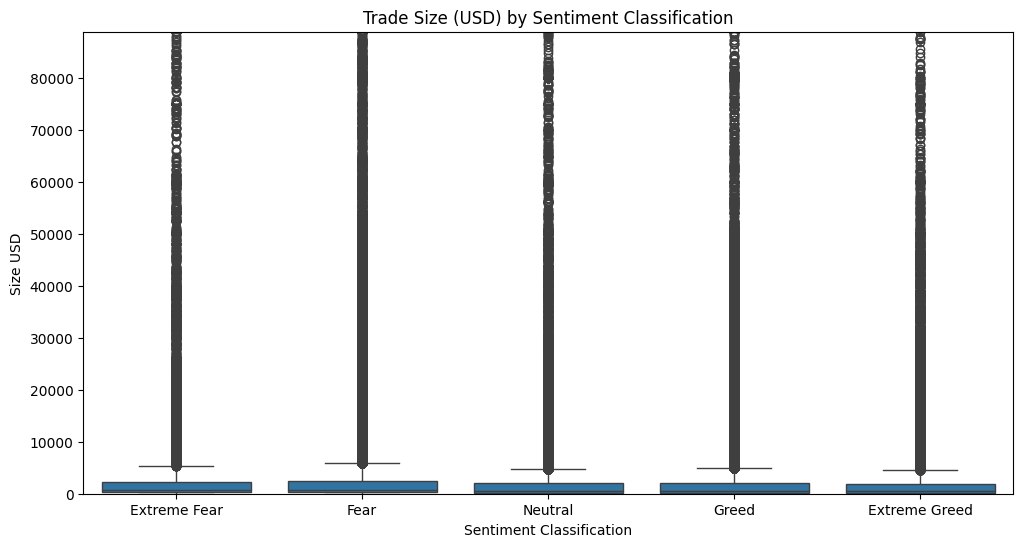

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Create the outputs directory if it doesn't exist (in case this cell is run first)
output_dir = 'ds_Krishnamurthi/outputs'
os.makedirs(output_dir, exist_ok=True)

# 1. Analyze the relationship between Trade_Type and Closed PnL under different sentiment conditions
trade_type_sentiment_pnl = merged_df.groupby(['classification', 'Trade_Type'])['Closed PnL'].mean().reset_index()
print("Average Closed PnL by Sentiment Classification and Trade Type:")
display(trade_type_sentiment_pnl)

# Pivot the table for better readability
trade_type_sentiment_pnl_pivot = trade_type_sentiment_pnl.pivot(index='Trade_Type', columns='classification', values='Closed PnL')
print("\nPivoted Average Closed PnL by Trade Type and Sentiment Classification:")
display(trade_type_sentiment_pnl_pivot)

# 4. Analyze the distribution of 'Execution Price' and 'Size USD' for different sentiment classifications
plt.figure(figsize=(12, 6))
sns.boxplot(x='classification', y='Execution Price', data=merged_df, order=sentiment_mapping.keys())
plt.title('Execution Price by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Execution Price')
plt.ylim(0, merged_df['Execution Price'].quantile(0.99)) # Limit y-axis for better visualization
plt.savefig(os.path.join(output_dir, 'execution_price_by_sentiment_classification_boxplot.png'))
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='classification', y='Size USD', data=merged_df, order=sentiment_mapping.keys())
plt.title('Trade Size (USD) by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Size USD')
plt.ylim(0, merged_df['Size USD'].quantile(0.99)) # Limit y-axis for better visualization
plt.savefig(os.path.join(output_dir, 'trade_size_usd_by_sentiment_classification_boxplot_2.png'))
plt.show()

insight :
Investigate lag effects between sentiment and trading behavior by analyzing the correlation between sentiment score on one day and trading volume/profitability on subsequent days (instruction 2). Additionally, explore distinct trading behaviors or profitability patterns of individual accounts under different sentiment conditions (instruction 3).



In [92]:
# 2. Investigate lag effects between sentiment and trading behavior

daily_agg_df['Sentiment_Score_Lag1'] = daily_agg_df['Average_Sentiment_Score'].shift(1)
daily_agg_df['Sentiment_Score_Lag2'] = daily_agg_df['Average_Sentiment_Score'].shift(2)


lag_correlation_volume_lag1 = daily_agg_df['Total_Daily_Size_USD'].corr(daily_agg_df['Sentiment_Score_Lag1'])
lag_correlation_volume_lag2 = daily_agg_df['Total_Daily_Size_USD'].corr(daily_agg_df['Sentiment_Score_Lag2'])
lag_correlation_pnl_lag1 = daily_agg_df['Average_Daily_PnL'].corr(daily_agg_df['Sentiment_Score_Lag1'])
lag_correlation_pnl_lag2 = daily_agg_df['Average_Daily_PnL'].corr(daily_agg_df['Sentiment_Score_Lag2'])

print(f"\nCorrelation between Total Daily Size USD and Sentiment Score (1-day lag): {lag_correlation_volume_lag1:.2f}")
print(f"Correlation between Total Daily Size USD and Sentiment Score (2-day lag): {lag_correlation_volume_lag2:.2f}")
print(f"Correlation between Average Daily PnL and Sentiment Score (1-day lag): {lag_correlation_pnl_lag1:.2f}")
print(f"Correlation between Average Daily PnL and Sentiment Score (2-day lag): {lag_correlation_pnl_lag2:.2f}")

# 3. Explore distinct trading behaviors or profitability patterns of individual accounts under different sentiment conditions.

account_sentiment_metrics = merged_df.groupby(['Account', 'classification']).agg(
    Average_Size_USD=('Size USD', 'mean'),
    Average_Closed_PnL=('Closed PnL', 'mean'),
    Total_Trades=('Account', 'count')
).reset_index()

print("\nAverage Trading Metrics by Account and Sentiment Classification:")
display(account_sentiment_metrics.head())

# Further analysis could involve identifying accounts with significantly different behavior under certain sentiment conditions

profitable_accounts_extreme_fear = account_sentiment_metrics[
    (account_sentiment_metrics['classification'] == 'Extreme Fear') &
    (account_sentiment_metrics['Average_Closed_PnL'] > account_sentiment_metrics['Average_Closed_PnL'].quantile(0.95))
]

print("\nAccounts with High Average PnL during Extreme Fear:")
display(profitable_accounts_extreme_fear)


Correlation between Total Daily Size USD and Sentiment Score (1-day lag): -0.19
Correlation between Total Daily Size USD and Sentiment Score (2-day lag): -0.19
Correlation between Average Daily PnL and Sentiment Score (1-day lag): 0.02
Correlation between Average Daily PnL and Sentiment Score (2-day lag): 0.02

Average Trading Metrics by Account and Sentiment Classification:


,Account,classification,Average_Size_USD,Average_Closed_PnL,Total_Trades
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Fear,15071.008600,1247.692214,100
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Greed,12080.270550,-42.626810,945
2,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,17020.494876,626.194346,1778
3,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,15134.130383,482.089321,574
4,0x083384f897ee0f19899168e3b1bec365f52a9012,Neutral,23336.999311,298.456334,421



Accounts with High Average PnL during Extreme Fear:


,Account,classification,Average_Size_USD,Average_Closed_PnL,Total_Trades
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Fear,15071.00860,1247.692214,100
80,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,Extreme Fear,2613.95276,900.002541,221


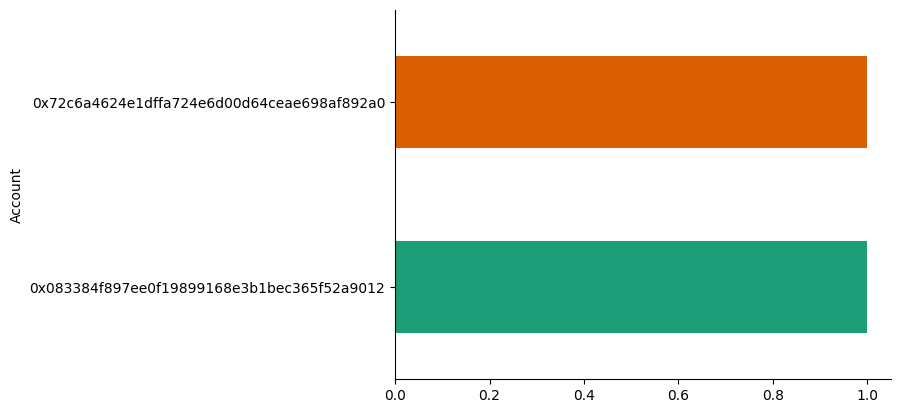

In [93]:
from matplotlib import pyplot as plt
import seaborn as sns
profitable_accounts_extreme_fear.groupby('Account').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

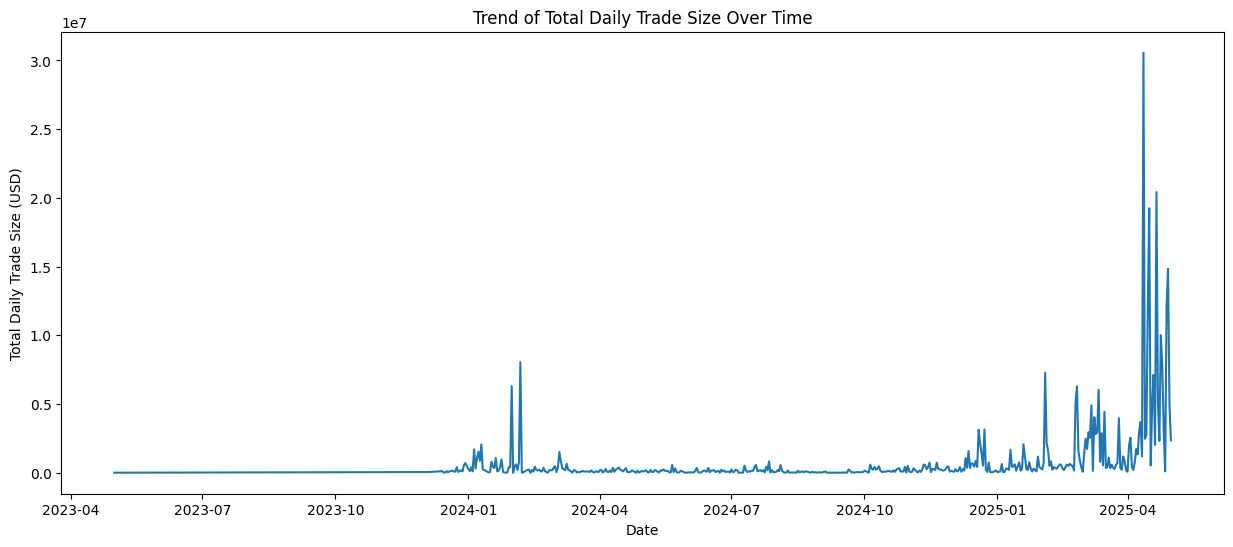

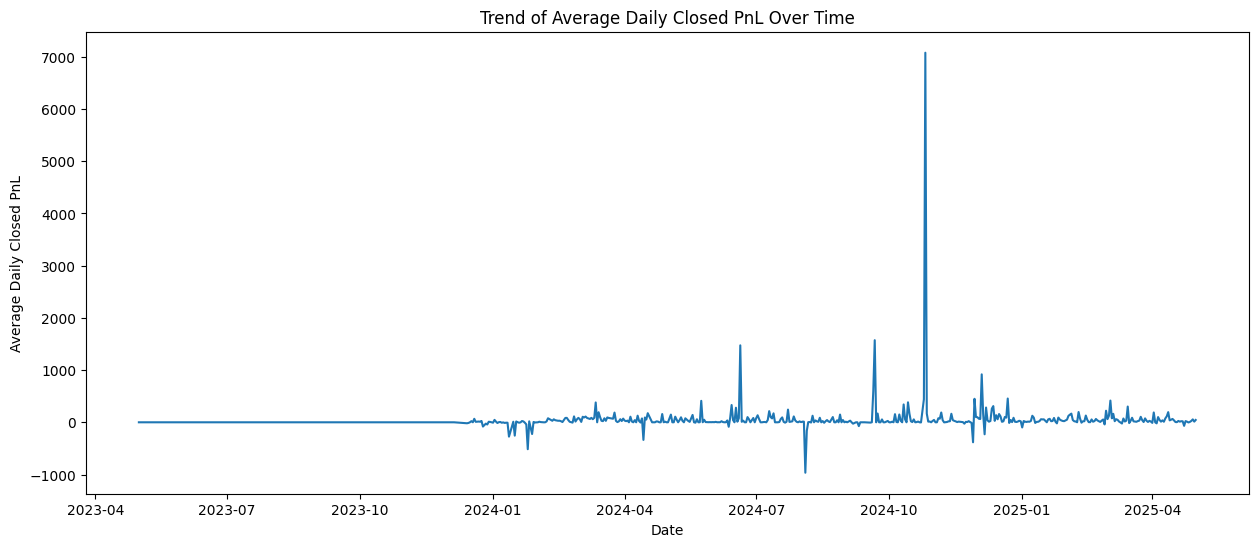

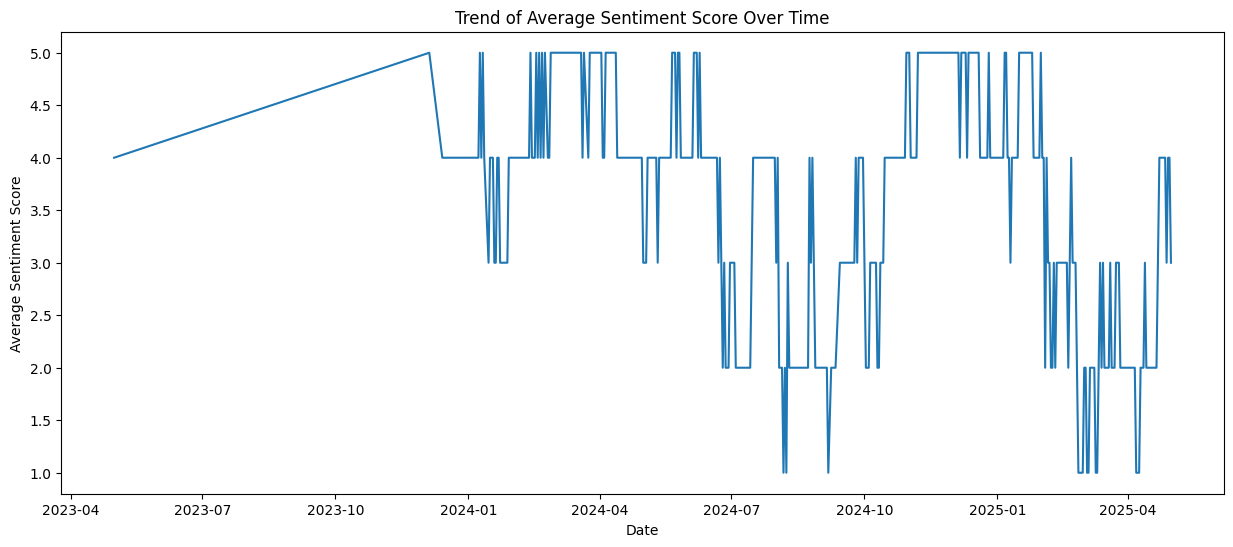

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create the outputs directory if it doesn't exist (in case this cell is run first)
output_dir = 'ds_Krishnamurthi/outputs'
os.makedirs(output_dir, exist_ok=True)

# 5. Look for any cyclical patterns or seasonality in trading volume, profitability, or sentiment over time.
# Plot the trend of daily total trade size over time
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Total_Daily_Size_USD', data=daily_agg_df)
plt.title('Trend of Total Daily Trade Size Over Time')
plt.xlabel('Date')
plt.ylabel('Total Daily Trade Size (USD)')
plt.savefig(os.path.join(output_dir, 'total_daily_trade_size_trend_2.png')) # Save the figure
plt.show()

# Plot the trend of daily average closed PnL over time
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Average_Daily_PnL', data=daily_agg_df)
plt.title('Trend of Average Daily Closed PnL Over Time')
plt.xlabel('Date')
plt.ylabel('Average Daily Closed PnL')
plt.savefig(os.path.join(output_dir, 'average_daily_closed_pnl_trend_2.png')) # Save the figure
plt.show()

# Plot the trend of average sentiment score over time
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Average_Sentiment_Score', data=daily_agg_df)
plt.title('Trend of Average Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.savefig(os.path.join(output_dir, 'average_sentiment_score_trend_2.png')) # Save the figure
plt.show()